<a href="https://colab.research.google.com/github/andresvosa/testNotebooks/blob/main/StrawSim_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [23]:
# Read measured straw data 
straw_df = pd.read_excel('Straw_Measurements.xlsx')
straw_df = straw_df.drop(['Unnamed: 0'], axis=1)
straw_df = straw_df.dropna(how='all')
straw_df['Straw_ID'] = straw_df['Straw_ID'].astype('int64')
straw_df.head()

,Straw_ID,Length,Diameter_u,Angle_v,Angle_h
1,1,150.0000,6.0800,0.0000,0.0000
2,1,155.0000,6.1900,1.9900,NaN
3,1,190.0000,5.7400,1.7700,NaN
4,1,228.0000,5.3300,4.5300,NaN
5,1,215.0000,5.2000,1.0100,NaN


In [24]:
#straw_df.dtypes
straw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 1 to 36
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Straw_ID    32 non-null     int64  
 1   Length      32 non-null     float64
 2   Diameter_u  32 non-null     float64
 3   Angle_v     32 non-null     float64
 4   Angle_h     8 non-null      float64
dtypes: float64(4), int64(1)
memory usage: 1.5 KB


In [25]:
straw_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Straw_ID,32.0000,2.9062,1.4449,1.0000,2.0000,3.0000,4.0000,5.0000
Length,32.0000,197.5312,39.3708,110.0000,170.0000,201.5000,228.5000,252.0000
Diameter_u,32.0000,5.4341,0.6494,4.1900,5.0550,5.4350,6.0000,6.5700
Angle_v,32.0000,3.2284,3.4464,0.0000,0.0000,2.2800,4.5075,12.8800
Angle_h,8.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


array([[<AxesSubplot: title={'center': 'Length'}>,
        <AxesSubplot: title={'center': 'Diameter_u'}>],
       [<AxesSubplot: title={'center': 'Angle_v'}>, <AxesSubplot: >]],
      dtype=object)

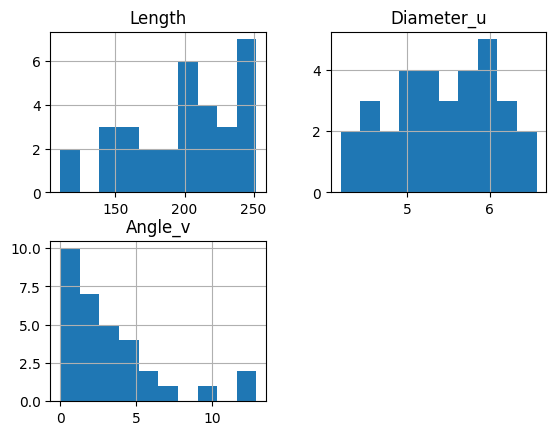

In [26]:
straw_df.hist(column=['Length', 'Diameter_u', 'Angle_v'])

0.22169285774953096
0.11647591750293884


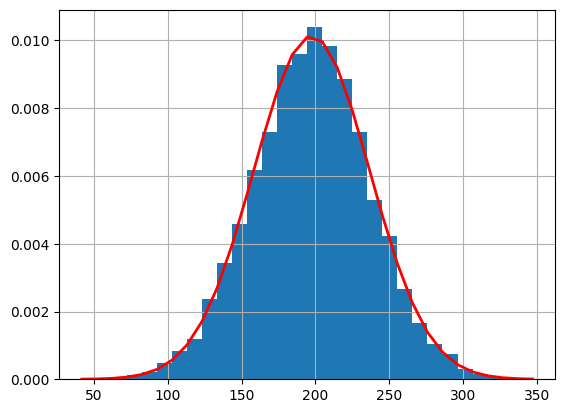

In [27]:
# Try to simulate lengths
no_of_samples = 10000 # number of samples 
mu, sigma = 197.531250, 39.370846 #mean and standard deviation
lens = np.random.normal(mu, sigma, no_of_samples)
# print(lens)
print(abs(mu - np.mean(lens)))
print(abs(sigma - np.std(lens, ddof=1)))
# Drawing distribution
count, bins, ignored = plt.hist(lens, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.grid()
plt.show()

0.005522798860011058
0.001231115020268625


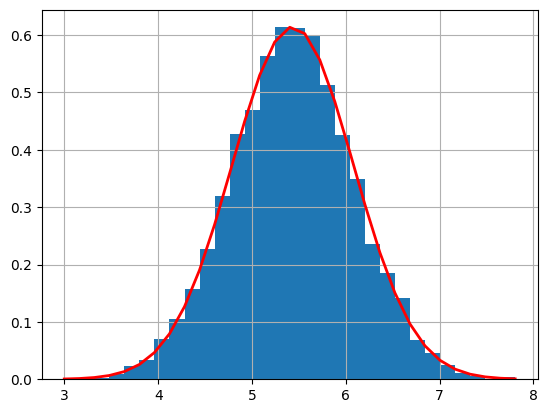

In [28]:
# Simulating diameters
mu_d, sigma_d = 5.434062, 0.649361 #mean and standard deviation
diams = np.random.normal(mu_d, sigma_d, no_of_samples)
# print(diams)
print(abs(mu_d - np.mean(diams)))
print(abs(sigma_d - np.std(diams, ddof=1)))
# Drawing distribution
count, bins, ignored = plt.hist(diams, 30, density=True)
plt.plot(bins, 1/(sigma_d * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu_d)**2 / (2 * sigma_d**2) ),
         linewidth=2, color='r')
plt.grid()
plt.show()

0.014069928538892551
0.016286520797057058


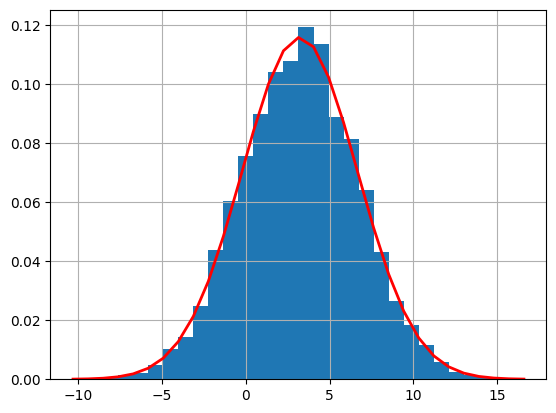

In [29]:
# Simulating vertical angles
mu_v, sigma_v = 3.228438, 3.446365 #mean and standard deviation
v_angles = np.random.normal(mu_v, sigma_v, no_of_samples)
# print(v_angles)
print(abs(mu_v - np.mean(v_angles)))
print(abs(sigma_v - np.std(v_angles, ddof=1)))
# Drawing distribution
count, bins, ignored = plt.hist(v_angles, 30, density=True)
plt.plot(bins, 1/(sigma_v * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu_v)**2 / (2 * sigma_v**2) ),
         linewidth=2, color='r')
plt.grid()
plt.show()

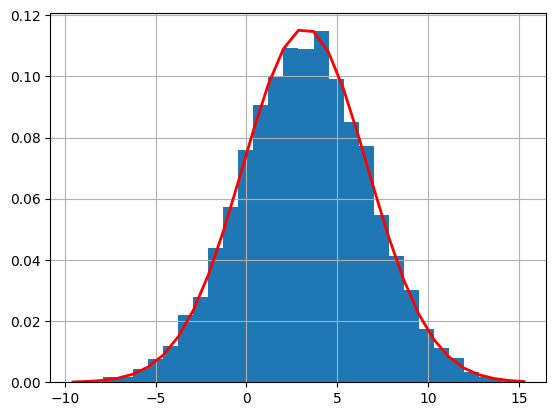

In [30]:
# Simulating horisontal angles
mu_h, sigma_h = 3.228438, 3.446365 #mean and standard deviation
h_angles = np.random.normal(mu_h, sigma_h, no_of_samples)
#low, high = 0.0, 360.0
#h_angles = np.random.uniform(low, high, no_of_samples)
# print(h_angles)
# Drawing distribution
count, bins, ignored = plt.hist(h_angles, 30, density=True)
plt.plot(bins, 1/(sigma_h * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu_h)**2 / (2 * sigma_h**2) ),
         linewidth=2, color='r')
plt.grid()
plt.show()

In [31]:
# Creating simulated straw dataframe
id_zeros = np.zeros(no_of_samples, dtype='int64')
#simu_array = np.stack((id_zeros, lens, diams, v_angles, h_angles), axis=1)
column_names = straw_df.columns.to_list()
#straw_simu_df = pd.DataFrame(simu_array, column_names)
straw_simu_df = pd.DataFrame({column_names[0]: id_zeros.tolist(), 
                              column_names[1]:  lens.tolist(),
                              column_names[2]:  diams.tolist(),
                              column_names[3]:  np.abs(v_angles).tolist(),
                              column_names[4]:  h_angles.tolist()})
straw_simu_df.head()

,Straw_ID,Length,Diameter_u,Angle_v,Angle_h
0,0,186.7726,5.3510,1.3958,4.7476
1,0,148.8301,4.1832,1.8367,-0.8075
2,0,226.0834,5.3285,4.6237,3.8213
3,0,143.7586,5.0184,0.8919,3.6063
4,0,153.9592,4.7468,0.9407,6.3909


In [42]:
# Get random straw from simulated straw dataframe
sections_list = [5, 6, 7, 8, 9, 10, 11] # How many sections in straw can have
sections_selected = np.random.choice(sections_list, 1) # Select random sections
rnd_straw = straw_simu_df.sample(n=sections_selected, axis='rows', replace=True)
rnd_straw.iloc[0, -1] = 0.0 # First length angles are 0
rnd_straw.iloc[0, -2] = 0.0
print ('Sections: ' + str(sections_selected))
print('Straw length: ' + str(rnd_straw['Length'].sum()) + 'mm')
rnd_straw

Sections: [9]
Straw length: 1825.255017613128mm


,Straw_ID,Length,Diameter_u,Angle_v,Angle_h
6835,0,285.2719,4.4300,0.0000,0.0000
6120,0,201.5274,5.8307,9.4130,6.3745
8582,0,149.7517,4.9672,4.2186,-1.0065
497,0,238.3399,6.1086,0.0473,-0.4929
375,0,177.6668,5.5575,6.5129,7.4877
8641,0,240.1843,5.9631,3.7270,2.8307
911,0,123.4410,5.8853,2.3060,5.7263
3822,0,176.7742,5.1411,1.7301,7.4065
6438,0,232.2978,4.9136,5.3882,3.9071


In [43]:
# Functions to calculate end point coordinates
def sphere_to_chart(length : float, betha_xz : float, alpha_xy : float, x_st : float=0.0, y_st : float=0.0, z_st : float=0.0) -> tuple[float, float, float]:
    betha_xz_rad = np.deg2rad(betha_xz)
    alpha_xy_rad = np.deg2rad(90.0 - alpha_xy)
    return x_st + (length * np.cos(betha_xz_rad) * np.sin(alpha_xy_rad)), y_st + (length * np.cos(betha_xz_rad) * np.cos(alpha_xy_rad)), z_st + (length * np.sin(betha_xz_rad))

def apply_wrapper(apply_rida):
    return sphere_to_chart(apply_rida['Length'], apply_rida['Angle_v'], apply_rida['Angle_h'])


In [44]:
# print(rnd_straw.apply(apply_wrapper, axis=1, result_type="expand"))
rnd_straw[['x', 'y', 'z']] = rnd_straw.apply(apply_wrapper, axis=1, result_type="expand")
pd.options.display.float_format = '{:,.4f}'.format #Display format 
rnd_straw

,Straw_ID,Length,Diameter_u,Angle_v,Angle_h,x,y,z
6835,0,285.2719,4.4300,0.0000,0.0000,285.2719,0.0000,0.0000
6120,0,201.5274,5.8307,9.4130,6.3745,197.5846,22.0736,32.9598
8582,0,149.7517,4.9672,4.2186,-1.0065,149.3229,-2.6234,11.0161
497,0,238.3399,6.1086,0.0473,-0.4929,238.3310,-2.0505,0.1969
375,0,177.6668,5.5575,6.5129,7.4877,175.0150,23.0029,20.1523
8641,0,240.1843,5.9631,3.7270,2.8307,239.3839,11.8365,15.6127
911,0,123.4410,5.8853,2.3060,5.7263,122.7255,12.3065,4.9669
3822,0,176.7742,5.1411,1.7301,7.4065,175.2193,22.7773,5.3371
6438,0,232.2978,4.9136,5.3882,3.9071,230.7339,15.7585,21.8134


In [48]:
def vec_len_3d (x : float, y : float, z: float) -> float:
    return np.sqrt(x**2 + y**2 + z**2)

def test_shift(apply_row):
    print(apply_row, type(apply_row))

In [49]:
x, y, z = sphere_to_chart(220.047272, 3.907266,	2.598694)
print(x, y, z)
print(vec_len_3d(x, y, z))
x, y, z = sphere_to_chart(220.047272, 2.598694, 3.907266,)
print(x, y, z)
print(vec_len_3d(x, y, z))

219.3100342688166 9.953801125613124 14.994419855540198
220.047272
219.3100342688166 14.978999647168285 9.976991190865473
220.047272


In [50]:
rnd_straw.apply(test_shift, axis=1, result_type="expand")

Straw_ID       0.0000
Length       285.2719
Diameter_u     4.4300
Angle_v        0.0000
Angle_h        0.0000
x            285.2719
y              0.0000
z              0.0000
Name: 6835, dtype: float64 <class 'pandas.core.series.Series'>
Straw_ID       0.0000
Length       201.5274
Diameter_u     5.8307
Angle_v        9.4130
Angle_h        6.3745
x            197.5846
y             22.0736
z             32.9598
Name: 6120, dtype: float64 <class 'pandas.core.series.Series'>
Straw_ID       0.0000
Length       149.7517
Diameter_u     4.9672
Angle_v        4.2186
Angle_h       -1.0065
x            149.3229
y             -2.6234
z             11.0161
Name: 8582, dtype: float64 <class 'pandas.core.series.Series'>
Straw_ID       0.0000
Length       238.3399
Diameter_u     6.1086
Angle_v        0.0473
Angle_h       -0.4929
x            238.3310
y             -2.0505
z              0.1969
Name: 497, dtype: float64 <class 'pandas.core.series.Series'>
Straw_ID       0.0000
Length       177.6668
D

6835    None
6120    None
8582    None
497     None
375     None
8641    None
911     None
3822    None
6438    None
dtype: object